In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 20, 10

In [2]:
from wikipedia2vec import Wikipedia2Vec

In [3]:
from naive_bayes_classifier.configure import STOP_CHARS
from utils import *
from back_test import *

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [4]:
from sklearn.ensemble import *

In [5]:
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm

In [6]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

In [7]:
w2v_model = Wikipedia2Vec.load("../enwiki_20180420_win10_500d.pkl")

In [8]:
rate_se, rst_lst = load_data()

In [9]:
rev_ar = np.vstack(get_reval(rst_lst, rate_se))

C:\Users\hoore\Documents\workspace\nlp\nlp_project\utils.py:33: RuntimeWarning: divide by zero encountered in log
  tt = np.log(np.hstack((prev, rev)) / this)
C:\Users\hoore\Documents\workspace\nlp\nlp_project\utils.py:33: RuntimeWarning: invalid value encountered in log
  tt = np.log(np.hstack((prev, rev)) / this)
C:\Users\hoore\Documents\workspace\nlp\nlp_project\utils.py:33: RuntimeWarning: divide by zero encountered in true_divide
  tt = np.log(np.hstack((prev, rev)) / this)
C:\Users\hoore\Documents\workspace\nlp\nlp_project\utils.py:33: RuntimeWarning: invalid value encountered in true_divide
  tt = np.log(np.hstack((prev, rev)) / this)


In [10]:
vec_lst = []
for itm in tqdm(rst_lst):
    txt = itm[2].lower()
    
    for c in STOP_CHARS:
        txt = txt.replace(c, "")
    
    wd_lst = txt.split(" ")
    
    vec = np.zeros((500,))
    for wd in wd_lst:
        try:
            vec += w2v_model.get_word_vector(wd)
        except KeyError:
            pass
    
    vec_lst.append(vec)

100%|█████████████████████████████████████████████████████████| 774/774 [00:53<00:00, 14.49it/s]


In [11]:
X = np.vstack(vec_lst)

In [12]:
y = get_y(rev_ar, 1, 0.3)

In [13]:
y.shape

(774,)

In [14]:
X.shape

(774, 500)

In [15]:
y_pred4 = rolling_test_single(ExtraTreesClassifier(n_estimators=50, n_jobs=-1), X, y, 300)

In [16]:
evaluate(y, y_pred4)

acuracy: 0.46382428940568476
    precision: 0.46382428940568476
    recall: 0.46382428940568476
    f1: 0.46382428940568476


In [17]:
prd_count = 1

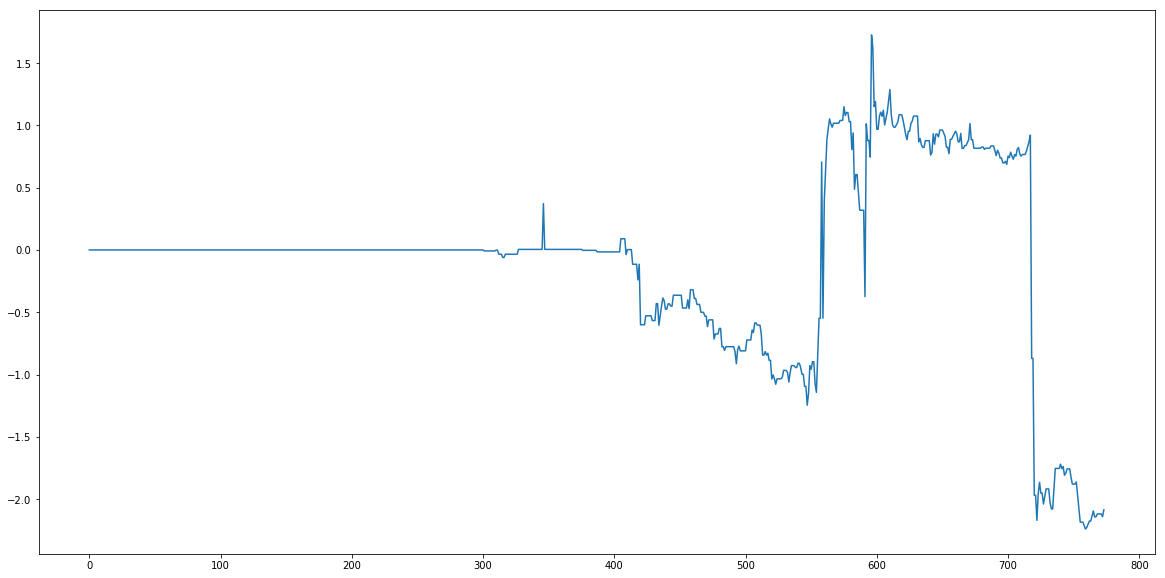

In [18]:
plt.plot(np.cumsum((rev_ar[:, 10 + prd_count] - rev_ar[:, 9 + prd_count]) * y_pred4))